Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2917 images belonging to 6 classes.
Found 732 images belonging to 6 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 32)      0         
________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
92/92 [==============================] - 43s 463ms/step - loss: 1.7910 - accuracy: 0.2161 - val_loss: 1.7563 - val_accuracy: 0.2145
Epoch 2/200
92/92 [==============================] - 41s 449ms/step - loss: 1.7263 - accuracy: 0.2438 - val_loss: 1.7746 - val_accuracy: 0.2637
Epoch 3/200
92/92 [==============================] - 41s 448ms/step - loss: 1.7184 - accuracy: 0.2319 - val_loss: 1.7666 - val_accuracy: 0.2555
Epoch 4/200
92/92 [==============================] - 41s 447ms/step - loss: 1.7124 - accuracy: 0.2410 - val_loss: 1.7343 - val_accuracy: 0.3347
Epoch 5/200
92/92 [==============================] - 41s 445ms/step - loss: 1.6962 - accuracy: 0.2843 - val_loss: 1.7785 - val_accuracy: 0.1298
Epoch 6/200
92/92 [==============================] - 41s 445ms/step - loss: 1.6697 - accuracy: 0.2944 - val_loss: 1.7960 - val_accuracy: 0.1639
Epoch 7/200
92/92 [==============================] - 41s 447ms/step - loss: 1.6794 - accuracy: 0.2892 - val_loss: 1.6615 - val_accuracy:

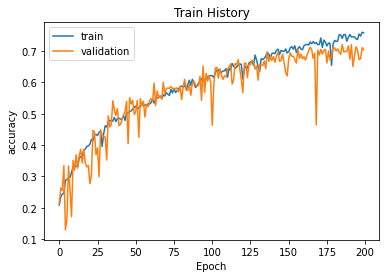

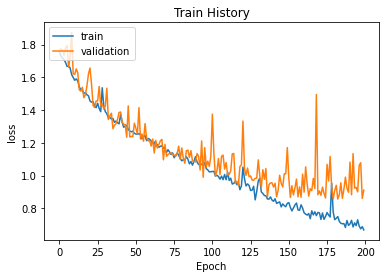

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

   cardboard       0.91      0.84      0.87        81
       glass       0.83      0.61      0.70       162
       metal       0.62      0.76      0.68       131
       paper       0.67      0.81      0.73       150
     plastic       0.67      0.63      0.65       131
       trash       0.61      0.57      0.59        77

    accuracy                           0.70       732
   macro avg       0.72      0.70      0.71       732
weighted avg       0.72      0.70      0.70       732

Confusion Matrix


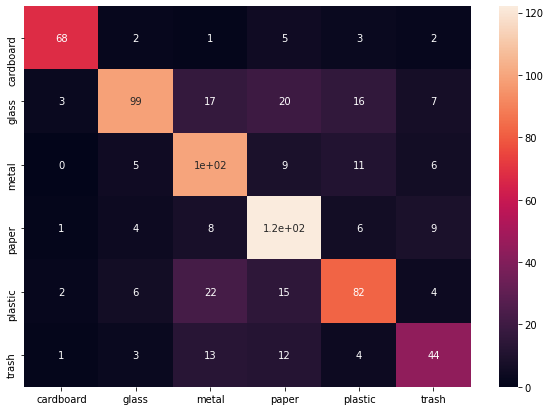

In [4]:
#%%
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras import backend as K 
from google.colab import drive

drive.mount('/content/drive')

# parameters
img_width, img_height = 224, 224  # dimensions to which the images will be resized
n_epochs = 200
batch_size = 64
num_classes = 6  # categories of trash


dataset_dir = '/content/dataset_splited'
train_data = '/content/dataset_splited/train'
validation_data = '/content/dataset_splited/val'

# import splitfolders  # or import split_folders
# splitfolders.ratio('/content/dataset', output=dataset_dir, seed=1337, ratio=(.8, .2)) # default values

# train_datagen = ImageDataGenerator(
#     rescale=1. / 255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     validation_split=0.2)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2
    )

validation_datagen = ImageDataGenerator(rescale=1. / 255)

train = train_datagen.flow_from_directory(
    train_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode ='binary'
    )


validation = validation_datagen.flow_from_directory(
    validation_data,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
    class_mode ='binary'
    )

# train_generator = train_datagen.flow_from_directory(
#     dataset_dir,
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode ='binary')

# from sklearn.model_selection import train_test_split
# train,validation = train_test_split(train_generator,test_size=0.2,random_state=0)





if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


    
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K 
import tensorflow as tf


model = Sequential()  # Build Linear Model
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=input_shape))
model.add(BatchNormalization(fused=False, trainable=False))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(fused=False, trainable=False))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(fused=False, trainable=False))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(fused=False, trainable=False))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(fused=False, trainable=False))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization(fused=False, trainable=False))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
# model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization(fused=False, trainable=False))
# model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization(fused=False, trainable=False))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.summary()


from tensorflow.keras.optimizers import Adam
optimizer=Adam(0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
train_history = model.fit_generator(train,
        steps_per_epoch=(len(train)),
        epochs=n_epochs,
        validation_data=validation,
        validation_steps=(len(validation)))
model.save('/content/drive/MyDrive/ColabNotebooks/model_saved.h5')

# Convert to TensorFlow Lite model.
keras_model = tf.keras.models.load_model("/content/drive/MyDrive/ColabNotebooks/model_saved.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()
open("/content/drive/MyDrive/ColabNotebooks/converted_model.tflite", "wb").write(tflite_model)
print("saved")


def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
def print_classification_report():
    # Confution Matrix and Classification Report
    Y_pred = model.predict_generator(validation, len(validation))
    y_pred = np.argmax(Y_pred, axis=1)

    print('Classification Report')
    target_names = list(validation.class_indices.keys())
    print(classification_report(validation.classes, y_pred, target_names=target_names))

    print('Confusion Matrix')
    conf_mat = confusion_matrix(validation.classes, y_pred)
    df_cm = pd.DataFrame(conf_mat, index=target_names, columns=target_names)
    plt.figure(figsize=(10, 7))
    sn.heatmap(df_cm, annot=True)

print_classification_report()


# %%


In [ ]:
import numpy as np
i = np.array
while(True):   
i.append('a')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

!unzip '/content/drive/MyDrive/ColabNotebooks/dataset.zip' -d '/content/'
!pip install split-folders
!pip install split-folders tqdm


import splitfolders  # or import split_folders
splitfolders.ratio('/content/dataset', output='/content/dataset_splited', seed=1337, ratio=(.8, .2)) # default values

In [ ]:
!pip install split-folders tqdm